### Example notebook on how to truncate waveform by `flow`

In [12]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict, colorsDict
from gw_eccentricity import measure_eccentricity, truncate_at_flow
from gw_eccentricity.utils import amplitude_using_all_modes, peak_time_via_quadratic_fit
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/home1/md.shaikh/Eccentricity/EccTests/EOBTests/")
import seobnrv4ehm as seob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


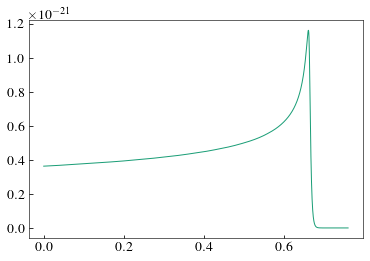

In [64]:
q = 4
chi1 = 0.6
chi2 = -0.4
ecc = 0.0005
f_min = 30
M = 50
EccIC=-1
mean_anomaly = np.pi/2
t, hlm = seob.get_modes(q=q, chi1=chi1, chi2=chi2, eccentricity=ecc, eccentric_anomaly=mean_anomaly, f_min=f_min, M_fed=M, physical_units=True, EccIC=EccIC, save=False)
plt.plot(t, np.abs(hlm[(2, 2)]))

(0.0, 50.0)

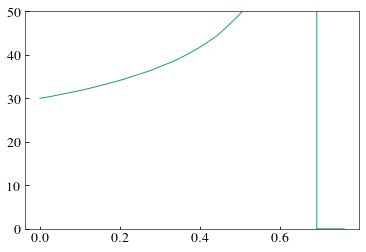

In [65]:
plt.plot(t, np.gradient(-np.unwrap(np.angle(hlm[(2, 2)])), t)/(2*np.pi))
plt.ylim(0, 50)

Truncate at `flow=20`

/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:919: UserWarning: Assuming the waveform to be quasicircular.
Frequency method might not be efficient in detecting extrema for small eccentricity (< 1e-3). Using ['ResidualAmplitude', 'AmplitudeFits'] method might give better result.
  warnings.warn(


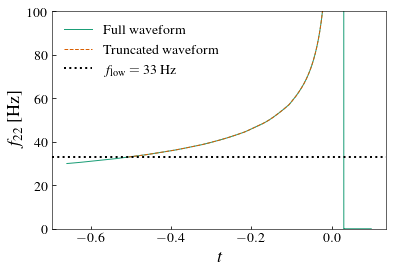

In [67]:
flow = 33
tpeak = peak_time_via_quadratic_fit(t, amplitude_using_all_modes(hlm))[0]
t = t - tpeak
dataDict = {"t": t, "hlm": {(2, 2): hlm[(2, 2)]}}
truncatedDict, gwecc_object = truncate_at_flow(
    flow=flow,
    method="Frequency",
    dataDict=dataDict)
use_fancy_plotsettings()
plt.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)]))/2/np.pi, dataDict["t"]), label="Full waveform")
plt.plot(truncatedDict["t"], -np.gradient(np.unwrap(np.angle(truncatedDict["hlm"][(2, 2)])), truncatedDict["t"])/2/np.pi, ls="--", c=colorsDict["brown"], label="Truncated waveform")
plt.ylim(0, 100)
plt.axhline(flow, ls=":", c="k", lw=2, label=f"$f_{{\mathrm{{low}}}}={flow}$ Hz")
plt.xlabel(labelsDict["t"])
plt.ylabel("$f_{22}$ [Hz]")
plt.legend()

In [61]:
gwecc_object.omega22_pericenters_interp(gwecc_object.t_pericenters_interp)/(2*np.pi)

array([ 30.01199124,  30.02141471,  30.03080416, ..., 228.91710519,
       231.81504722, 234.74575703])

In [62]:
gwecc_object.measure_ecc(dataDict["t"])

/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:902: UserWarning: Number of cycles = 15.16306242146014 >= suggested 6 but number of apocenters is 0.
  warnings.warn(
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:1332: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


{'eccentricity': array([2.22044605e-16, 2.22044605e-16, 2.22044605e-16, ...,
        2.22044605e-16, 2.22044605e-16, 2.22044605e-16]),
 'mean_anomaly': array([0.        , 0.06544985, 0.13089969, ..., 6.15363509, 6.2184102 ,
        0.        ]),
 'tref_out': array([-6.60784845e-01, -6.60296564e-01, -6.59808283e-01, ...,
        -1.60515782e-03, -1.11687657e-03, -6.28595320e-04])}

(<Figure size 864x288 with 1 Axes>,
 <AxesSubplot:xlabel='$t$', ylabel='$l_{\\mathrm{gw}}$ [rad]'>)

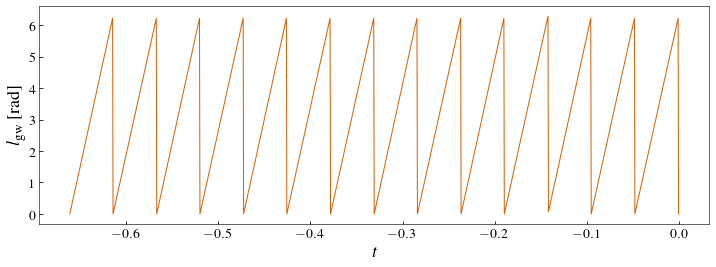

In [63]:
gwecc_object.plot_mean_ano()